In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

In [2]:
from src.nbody.main import NBodySimulation
import src.nbody.plot_utils as pu

In [41]:
ic_file = "./ics/gal_1e4.hdf5"

In [42]:
with h5.File(ic_file, "r") as hf:
    print(list(hf["Bodies"]))

['Masses', 'Positions', 'Velocities']


In [43]:
path_ics = ic_file
output_folder = "./outputs/"

In [44]:
G = 4.30091e-6

In [57]:
path_output = output_folder + 'output.hdf5'

e = 0.01
T = 3.0
dt = 5e-4
num_snapshots = 600

Sim = NBodySimulation(path_ics, path_output)

Sim.set_time(T, dt, snapshots=num_snapshots)
# Sim.set_time_NFW_off(0.5 * T)  # Turn off the NFW profile at half the runtime

# Sim.set_integrator("RK4")
Sim.set_integrator("Euler")
Sim.set_integrator("Symplectic")

Sim.estimate_runtime(3)  # We get a runtime estimation for 3 snapshots
Sim.run_simulation(e=e, G=G)

Estimated time: 00h 13m 26s
Mean time per step: 1.34e-01 s
100.00%
Elapsed time: 595.58 s


In [58]:
pu.make_frames(path_output, 
               marker_size=0.2,
                  )

Save images time: 23.67 s


In [59]:
# Example usage
frame_folder = 'outputs/frames/'
output_video_path = 'outputs/output_video.mp4'
pu.create_video_from_frames(frame_folder, output_video_path, frame_rate=30, resolution=(400, 400))

Video saved to outputs/output_video.mp4


In [60]:
POS_R, VEL_R, MASS, TIME = Sim.get_output()

# POS_R = POS_R.reshape(600,3)
# VEL_R = VEL_R.reshape(600,3)

In [61]:
VEL_R.shape

(600, 10000, 3)

In [62]:
# from numba import njit, prange

# # Conversion factors
# # kpc_to_m = np.float64(3.0857e19)  # 1 kpc = 3.0857e19 meters
# # kmps_to_mps = 1e3     # 1 km/s = 1e3 meters/second
# # Msun_to_kg = np.float64(1.9885e30)  # 1 Solar Mass = 1.9885e30 kg

# m=MASS[0] #* Msun_to_kg

# G = 4.302e-6

# # Convert G from original units to SI units
# # G_SI = np.float64(6.67430e-11)  # m^3 kg^-1 s^-2

# Gm2 = np.float64(G * m**2)  # Precompute G * m^2

# # POS_R = POS_R * kpc_to_m
# # VEL_R = VEL_R * kmps_to_mps

# # Calculate the kinetic energy T(t)
# vel_squared = np.sum(VEL_R**2, axis=2)  # v_i^2 for each particle
# T_t = 0.5 * m * np.sum(vel_squared, axis=1)  # Sum over all particles


# @njit(parallel=True, fastmath=True, cache=False)
# def calculate_potential_energy(positions, Gm2):
#     num_timesteps = positions.shape[0]
#     num_particles = positions.shape[1]
#     U_t = np.zeros(num_timesteps)
    
#     for t in prange(num_timesteps):
#         U = 0.0
#         for i in range(num_particles):
#             for j in range(i + 1, num_particles):
#                 dx = positions[t, i, 0] - positions[t, j, 0]
#                 dy = positions[t, i, 1] - positions[t, j, 1]
#                 dz = positions[t, i, 2] - positions[t, j, 2]
#                 r_ij = np.sqrt(dx * dx + dy * dy + dz * dz)  # Manually compute distance
#                 if r_ij > 0:  # Avoid division by zero
#                     U -= Gm2 / r_ij
#         U_t[t] = U
        
#     return U_t

# # Potential energy calculation using Numba
# U_t = calculate_potential_energy(POS_R, Gm2)

# # Calculate the virial quantity 2T + U
# virial_quantity = (2 * T_t) + np.abs(U_t)

# # Plotting the result
# plt.figure(figsize=(10, 6))
# plt.plot(virial_quantity, label=r"$2T + U$", color='b')
# # plt.axhline(1, color='r', linestyle='--', label="Equilibrium Line")
# plt.xlabel("Time Step")
# plt.ylabel(r"$2T / U$")
# # plt.title("Virial Theorem Verification")
# plt.legend()
# plt.grid(True)
# plt.show()

In [63]:
POS_R[-1,:,:].shape

(10000, 3)

In [64]:
x = POS_R[-1,:,0]
y = POS_R[-1,:,1]
z = POS_R[-1,:,2]


In [65]:
# POS_R = POS_R[-1,:,:]
# 
# VEL_R = VEL_R[-1,:,:]


In [66]:
# counts, rbins = np.histogram(np.sqrt(x*x + y*y + z*z), bins=100)
c, r = np.histogram(np.sqrt(x*x + y*y + z*z), bins=20)

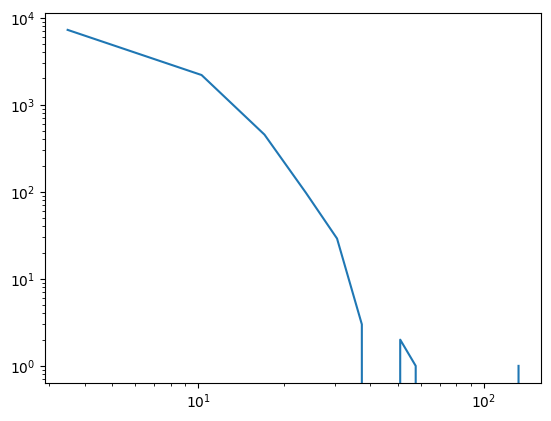

In [67]:
plt.plot(0.5*(r[1:]+r[:-1]),c)
plt.yscale("log")
plt.xscale("log")
# plt.xlim(0,15)

/Users/balu/UniMelb_3rdYr_MW_Nbody/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/balu/UniMelb_3rdYr_MW_Nbody/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


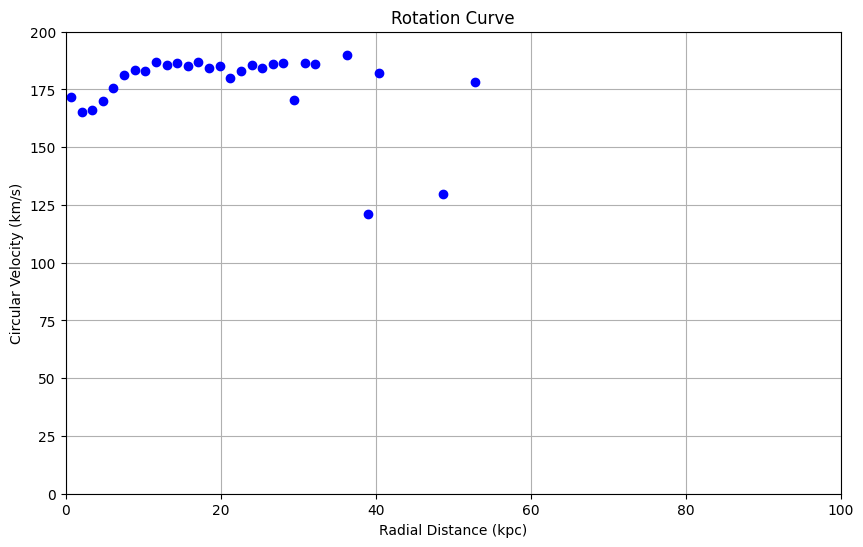

In [68]:
# Calculate radial distances from the center (assuming center at origin)
r = np.sqrt(np.sum(POS_R[-1]**2, axis=1))  # shape (10000,)

# Calculate circular (tangential) velocities
v_circ = np.sqrt(np.sum(VEL_R[-1]**2, axis=1))  # shape (10000,)

# Bin the radial distances
radial_bins = np.linspace(0, np.max(r), 100)  # 50 bins from 0 to max radial distance
radial_bin_centers = 0.5 * (radial_bins[:-1] + radial_bins[1:])
v_circ_avg = np.zeros_like(radial_bin_centers)

# Calculate average circular velocity in each radial bin
for i in range(len(radial_bin_centers)):
    in_bin = (r >= radial_bins[i]) & (r < radial_bins[i+1])
    v_circ_avg[i] = np.mean(v_circ[in_bin])

# Plot the rotation curve
plt.figure(figsize=(10, 6))
plt.plot(radial_bin_centers, v_circ_avg, 'o', color='blue')  # converting to kpc and km/s for plot
plt.ylim(0,200)
plt.xlim(0,100)
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('Rotation Curve')
plt.grid(True)
plt.show()

In [69]:
np.sum(POS_R[-1]**2, axis=1).shape

(10000,)